**1. Using basic statistical properties of the variance, as well as single-variable calculus, derive (5.6). In other words, prove that $\alpha$ given by (5.6) does indeed minimize $\text{Var}(\alpha X + (1 − \alpha)Y)$.**

Using the identity

$$
\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) + 2\,\text{Cov}(X, Y),
$$

we can express the variance of a weighted combination of two variables as follows:

$$
\text{Var}(\alpha X + (1 − \alpha)Y) = \text{Var}(\alpha X) + \text{Var}((1 - \alpha)Y) + 2\,\text{Cov}(\alpha X, (1 - \alpha)Y).
$$

Applying the standard rules for scaling variances and covariances,

$$
\text{Var}(aX) = a^2\,\text{Var}(X), \quad \text{Cov}(aX, bY) = ab\,\text{Cov}(X, Y),
$$

we obtain:

$$
\alpha^2\,\text{Var}(X) + (1 - \alpha)^2\,\text{Var}(Y) + 2\alpha(1 - \alpha)\,\text{Cov}(X, Y).
$$

Let us denote

$$
\text{Var}(X) = \sigma_X^2,\quad \text{Var}(Y) = \sigma_Y^2,\quad \text{Cov}(X, Y) = \sigma_{XY}.
$$

Then the function to minimize becomes:

$$
\alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2\alpha(1 - \alpha) \sigma_{XY}.
$$

Expanding the square and cross terms:

$$
= \alpha^2 \sigma_X^2 + (1 - 2\alpha + \alpha^2)\sigma_Y^2 + 2\alpha(1 - \alpha) \sigma_{XY}
$$

$$
= \alpha^2 (\sigma_X^2 + \sigma_Y^2) - 2\alpha \sigma_Y^2 + \sigma_Y^2 + 2\alpha \sigma_{XY} - 2\alpha^2 \sigma_{XY}
$$

$$
= \alpha^2 (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) - 2\alpha (\sigma_Y^2 - \sigma_{XY}) + \sigma_Y^2.
$$

Now, taking the derivative with respect to $\alpha$:

$$
\frac{d}{d\alpha} = 2\alpha (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) - 2(\sigma_Y^2 - \sigma_{XY}).
$$

Setting the derivative equal to zero to find the minimum:

$$
2\alpha (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) = 2(\sigma_Y^2 - \sigma_{XY}),
$$

$$
\Rightarrow \alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}.
$$

**2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of $n$ observations.**

**(a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.**

Since each bootstrap observation is sampled uniformly at random from the $n$ original observations, the probability that any given observation equals the $j$th observation is $1/n$. Therefore, the probability that the first bootstrap observation is not the $j$th observation is:

$$
1 - \frac{1}{n}
$$

**(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?** 

As with the first bootstrap observation, the second is sampled independently and uniformly at random from the same set. Thus, the probability that it is not the $j$th observation remains:

$$
1 - \frac{1}{n}
$$

**(c) Argue that the probability that the jth observation is not in the bootstrap sample is $(1 - \frac{1}{n})^n$.**

Each bootstrap sample consists of $n$ draws with replacement. For the $j$th observation to be entirely absent from the bootstrap sample, it must not be selected in *any* of the $n$ draws. Since each draw is independent and the chance of not selecting observation $j$ is $1 - \frac{1}{n}$, the probability that it is not selected in all $n$ draws is:

$$
\left(1 - \frac{1}{n}\right)^n
$$

**(d) When $n = 5$, what is the probability that the jth observation is in the bootstrap sample?**

This is simply:

$$
1 - \left(1 - \frac{1}{5}\right)^5 = 1 - \left(\frac{4}{5}\right)^5 = 1 - 0.32768 = 0.67232
$$

**(e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?**

$$
1 - \left(1 - \frac{1}{100}\right)^{100} \approx 1 - 0.36603 = 0.63397
$$

**(f) When $n = 10,000$, what is the probability that the jth observation is in the bootstrap sample?**

$$
1 - \left(1 - \frac{1}{10000}\right)^{10000} \approx 1 - 0.36788 = 0.63212
$$

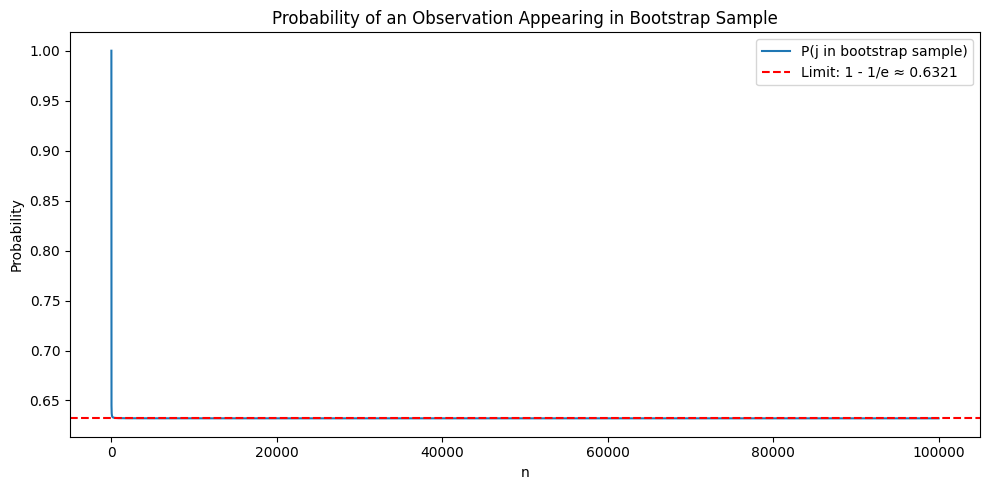

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1, 100000)
y = 1 - (1 - 1/n)**n

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(n, y, label='P(j in bootstrap sample)')
ax.axhline(1 - 1/np.e, color='red', linestyle='--', label='Limit: 1 - 1/e ≈ 0.6321')
ax.set_xlabel('n')
ax.set_ylabel('Probability')
ax.set_title('Probability of an Observation Appearing in Bootstrap Sample')
ax.legend()
plt.tight_layout()
plt.show()


The plot illustrates that as $n$ increases, the probability that any given observation is included in the bootstrap sample converges rapidly to approximately **0.6321**, which equals $1 - \frac{1}{e}$. This convergence explains a fundamental property of bootstrap sampling: for large $n$, **each original observation has about a 63.2% chance of being included** in any single bootstrap sample.

In [7]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = 4 in rng.choice(100, replace=True, size=100)
np.mean(store)

np.float64(0.6362)

The empirical probability that the 4th observation appears in a bootstrap sample of size 100 is approximately **0.6362**, which is remarkably close to the theoretical value $1 - \frac{1}{e} \approx 0.6321$. This simulation supports the idea that, for large $n$, each observation has about a 63.2% chance of being included in any given bootstrap sample.

**3. We now review $k$-fold cross-validation.**

**(a) Explain how $k$-fold cross-validation is implemented.**

In $k$-fold cross-validation, the dataset is randomly divided into $k$ roughly equal-sized subsets (or "folds"). The model is trained $k$ times, each time using $k - 1$ folds as the training set and the remaining fold as the validation set. The validation error is recorded for each iteration, and the final cross-validation estimate is obtained by averaging these $k$ error values.

**(b) What are the advantages and disadvantages of $k$-fold cross-validation relative to:**

**i. The validation set approach?**

Compared to the validation set approach, $k$-fold cross-validation provides a more reliable estimate of the model’s performance, as it reduces the variance caused by a single random train–test split. It also makes better use of the available data by training the model on a larger fraction of the dataset in each fold. However, this comes at a higher computational cost, as the model must be trained $k$ times instead of just once.

**ii. LOOCV?**

Relative to LOOCV, $k$-fold cross-validation is significantly more computationally efficient, especially when the number of observations $n$ is large. LOOCV requires fitting the model $n$ times, while $k$-fold cross-validation only requires $k$ fits, where typically $k \ll n$. However, LOOCV has lower bias since it uses nearly the entire dataset for training each time, though it can suffer from higher variance and computational burden compared to $k$-fold.

**4. Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we might estimate the standard deviation of our prediction.**

One way to estimate the standard deviation of a prediction is by using analytical formulas derived from linear regression theory. In the case of simple linear regression, the standard errors of the estimated coefficients are given by:

$$
\text{SE}(\hat{\beta}_0) = \sigma^2\left[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\right]
$$

$$
\text{SE}(\hat{\beta}_1) = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

where $\sigma^2 = \text{Var}(\epsilon)$ is the variance of the error term, assumed to be constant across observations and uncorrelated. These formulas allow us to quantify uncertainty in the estimated coefficients, and thereby derive the standard error of the prediction.

However, in practice, the assumptions required for these formulas—such as constant variance and independence of errors—may not hold. In such cases, a more flexible and generally applicable approach is the **bootstrap**. In this method, we repeatedly sample with replacement from the original dataset to create $B$ bootstrap samples. For each sample, we fit the model and store the prediction or coefficients of interest. The standard deviation of these $B$ bootstrap predictions provides an empirical estimate of the standard error of the prediction, without requiring strong distributional assumptions.